# Arduino Calibration

Take data with your arduino at known frequency. The goal is to match the known frequency to the Arduino's sampling frequency plot. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **LAB 3A**

In [ ]:
from scipy.fftpack import fft
RC_Data = np.loadtxt('/content/drive/MyDrive/RC_circuit_1kOhm0.csv')
Ohm100 = np.loadtxt('/content/drive/MyDrive/RC_100_OHms0.csv')
Capacitor = np.loadtxt('/content/drive/MyDrive/RC_circuit_100microF0.csv')

(605.0, 1000.0)

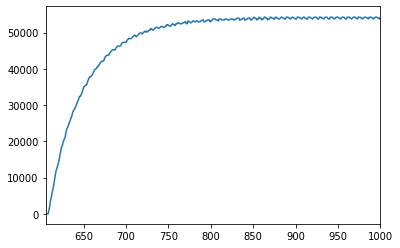

In [ ]:
f_guess = 4467.114093959732
nf_v = len(RC_Data)
time_per_sample = 1. / f_guess 
frequencies = np.arange(nf_v) * f_guess / nf_v # Hz
time_RC = np.arange(nf_v) * time_per_sample

#Visually zoom in on your plot and identify one well defined charge time (this should resemble your pre-lab plot)
#Hint: Use plt.xlim([x1,x2]) and pick x1 and x2 as integers that cover one full charge time

plt.plot(RC_Data)
x1 = 605
x2 = 1000 # OR 1400
plt.xlim([x1, x2])

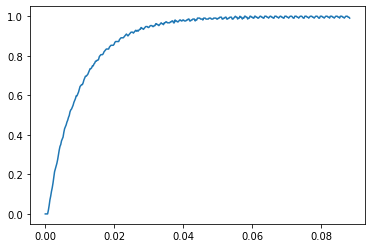

In [ ]:
#Trim your data down to just contain that single charge time
#Hint: You can create a new trimmed data array with  where x1 and x2 are the values from step 2
Trim_RC = RC_Data[x1:x2]

#Remove the DC offset from your new data
#Hint: You can remove an offset by subtracting the min value: TrimData = TrimData-min(TrimData)

Trim_RC = Trim_RC - min(Trim_RC)

#Normalize your new data to have a max plateau value of 1 V0 
#Hint: You can normalize by dividing it by the max value: TrimData = TrimData/max(TrimData)

Trim_RC = Trim_RC/max(Trim_RC)
Time_RC = time_RC[x1:x2] - time_RC[x1]
#Replot your new trimmed data with time on the x-axis and voltage intensity on the y-axis
plt.plot(Time_RC, Trim_RC)

In [ ]:
def modulation(t, parameters):
  m = 0.6
  A = parameters[0]
  fm = parameters[1]
  fc = parameters[2]
  phi = parameters[3]
  y = (1 + m * (np.cos((2*np.pi*fm*t)+phi))) * A * (np.sin(2*np.pi*fc*t))
  return y

In [ ]:
# Perform least squares fit

from scipy.optimize import least_squares
guess_parameters_RC = [1., 1.] 
res_lsq = least_squares(get_residuals_rc, guess_parameters_RC, args = (Trim_RC, Time_RC))
parameters_RC = res_lsq['x']
print(parameters_RC)

[0.99758544 0.01005285]


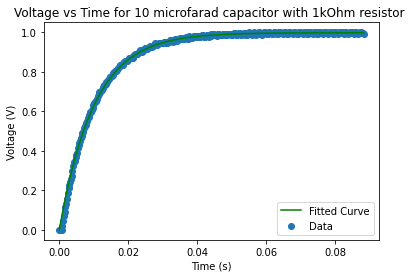

In [ ]:
# Create a fit curve
plt.plot(Time_RC, rc_exponential(Time_RC, parameters_RC), color = 'green', label = 'Fitted Curve')
plt.scatter(Time_RC, Trim_RC, label = 'Data')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs Time for 10 microfarad capacitor with 1kOhm resistor ')
plt.legend()

(3140.0, 3500.0)

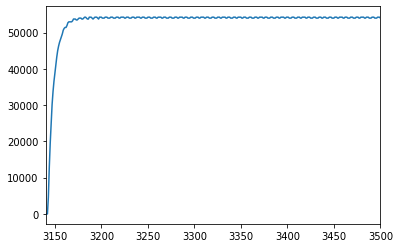

In [ ]:
f_guess = 4467.114093959732
nf_v = len(Ohm100)
time_per_sample = 1. / f_guess 
frequencies = np.arange(nf_v) * f_guess / nf_v # Hz
time_Ohm100 = np.arange(nf_v) * time_per_sample

#Visually zoom in on your plot and identify one well defined charge time (this should resemble your pre-lab plot)
#Hint: Use plt.xlim([x1,x2]) and pick x1 and x2 as integers that cover one full charge time

plt.plot(Ohm100)
x1 = 3140
x2 = 3500 # OR 1400
plt.xlim([x1, x2])

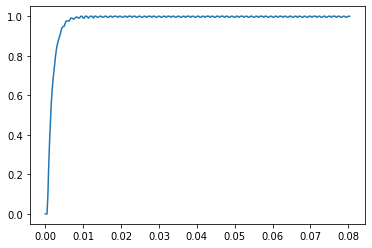

In [ ]:
#Trim your data down to just contain that single charge time
#Hint: You can create a new trimmed data array with  where x1 and x2 are the values from step 2
Trim_Ohm100 = Ohm100[x1:x2]

#Remove the DC offset from your new data
#Hint: You can remove an offset by subtracting the min value: TrimData = TrimData-min(TrimData)

Trim_Ohm100 = Trim_Ohm100 - min(Trim_Ohm100)

#Normalize your new data to have a max plateau value of 1 V0 
#Hint: You can normalize by dividing it by the max value: TrimData = TrimData/max(TrimData)

Trim_Ohm100 = Trim_Ohm100/max(Trim_Ohm100)
Time_Ohm100 = time_Ohm100[x1:x2] - time_Ohm100[x1]
#Replot your new trimmed data with time on the x-axis and voltage intensity on the y-axis
plt.plot(Time_Ohm100, Trim_Ohm100)

In [ ]:
# Perform least squares fit

from scipy.optimize import least_squares
guess_parameters_Ohm100 = [1., 1.] 
res_lsq = least_squares(get_residuals_rc, guess_parameters_Ohm100, args = (Trim_Ohm100, Time_Ohm100))
parameters_Ohm100 = res_lsq['x']
print(parameters_Ohm100)

[0.99950112 0.00190932]


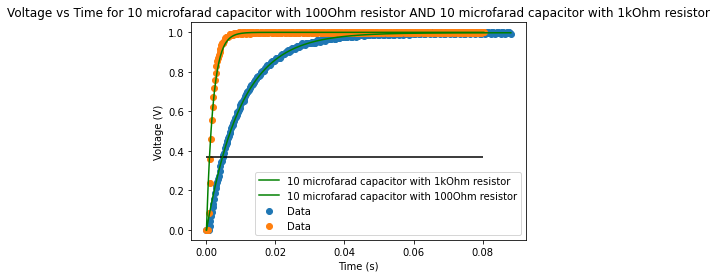

In [ ]:
# Create a fit curve
plt.plot(Time_RC, rc_exponential(Time_RC, parameters_RC), color = 'green', label = '10 microfarad capacitor with 1kOhm resistor')
plt.scatter(Time_RC, Trim_RC, label = 'Data')
plt.plot(Time_Ohm100, rc_exponential(Time_Ohm100, parameters_Ohm100), color = 'green', label = '10 microfarad capacitor with 100Ohm resistor')
plt.scatter(Time_Ohm100, Trim_Ohm100, label = 'Data')
plt.hlines(np.exp(-1), 0, 0.08)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs Time for 10 microfarad capacitor with 100Ohm resistor AND 10 microfarad capacitor with 1kOhm resistor')
plt.legend()

(2700.0, 3125.0)

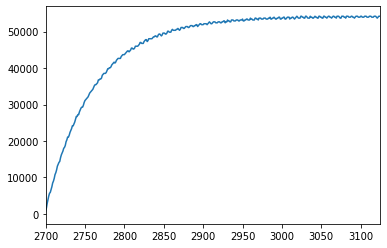

In [ ]:
f_guess = 4467.114093959732
nf_v = len(Capacitor)
time_per_sample = 1. / f_guess 
frequencies = np.arange(nf_v) * f_guess / nf_v # Hz
time_Capacitor = np.arange(nf_v) * time_per_sample

#Visually zoom in on your plot and identify one well defined charge time (this should resemble your pre-lab plot)
#Hint: Use plt.xlim([x1,x2]) and pick x1 and x2 as integers that cover one full charge time

plt.plot(Capacitor)
x1 = 2700
x2 = 3125
plt.xlim([x1, x2])

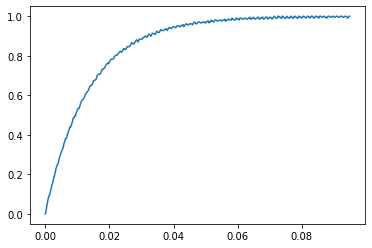

In [ ]:
#Trim your data down to just contain that single charge time
#Hint: You can create a new trimmed data array with  where x1 and x2 are the values from step 2
Trim_Capacitor = Capacitor[x1:x2]

#Remove the DC offset from your new data
#Hint: You can remove an offset by subtracting the min value: TrimData = TrimData-min(TrimData)

Trim_Capacitor = Trim_Capacitor - min(Trim_Capacitor)

#Normalize your new data to have a max plateau value of 1 V0 
#Hint: You can normalize by dividing it by the max value: TrimData = TrimData/max(TrimData)

Trim_Capacitor = Trim_Capacitor/max(Trim_Capacitor)
Time_Capacitor = time_Capacitor[x1:x2] - time_Capacitor[x1]
#Replot your new trimmed data with time on the x-axis and voltage intensity on the y-axis
plt.plot(Time_Capacitor, Trim_Capacitor)

In [ ]:
# Perform least squares fit

from scipy.optimize import least_squares
guess_parameters = [1., 1.] 
res_lsq = least_squares(get_residuals_rc, guess_parameters, args = (Trim_Capacitor, Time_Capacitor))
parameters = res_lsq['x']
print(parameters)

[0.99718157 0.01354049]


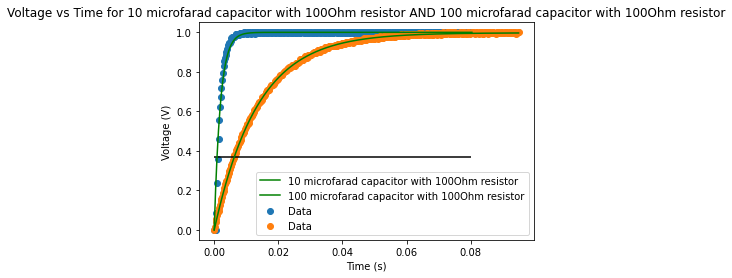

In [ ]:
# Create a fit curve
plt.plot(Time_Ohm100, rc_exponential(Time_Ohm100, parameters_Ohm100), color = 'green', label = '10 microfarad capacitor with 100Ohm resistor')
plt.scatter(Time_Ohm100, Trim_Ohm100, label = 'Data')
plt.hlines(np.exp(-1), 0, 0.08)
fit_curve = rc_exponential(Time_Capacitor, parameters)
plt.plot(Time_Capacitor, rc_exponential(Time_Capacitor, parameters), color = 'green', label = '100 microfarad capacitor with 100Ohm resistor')
plt.scatter(Time_Capacitor, Trim_Capacitor, label = 'Data')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs Time for 10 microfarad capacitor with 100Ohm resistor AND 100 microfarad capacitor with 100Ohm resistor')
plt.legend()


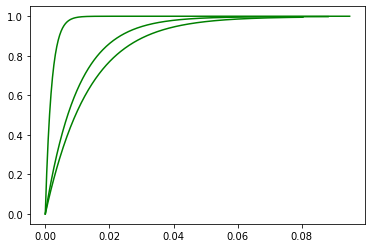

In [ ]:
plt.plot(Time_RC, rc_exponential(Time_RC, parameters_RC), color = 'green', label = 'Fitted Curve')
plt.plot(Time_Capacitor, rc_exponential(Time_Capacitor, parameters_Ohm100), color = 'green', label = 'Fitted Curve')
plt.plot(Time_Ohm100, rc_exponential(Time_Ohm100, parameters), color = 'green', label = 'Fitted Curve')
